In [1]:
import numpy as np
import pandas as pd
import lxml.etree as etree
import sqlite3 as sql
from process import DB
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
db = DB(db_route = '../data/database.sqlite')

In [5]:
df = db.stackFoulCardDF()

Stacking Cards:   0%|          | 0/14217 [00:00<?, ?it/s]

Stacking Fouls:   0%|          | 0/14217 [00:00<?, ?it/s]

In [106]:
df = pd.read_csv('../data/dummy_card_foul.csv', index_col = 'Unnamed: 0')

In [107]:
foul_columns = df.filter(regex = 'foul*').columns[2:]
for col in tqdm(foul_columns):
    df['home_team_%s' % col]  = df[df['fouling_team'] == df['home_team_api_id']][col]
    df['home_team_%s' % col] = df['home_team_%s' % col].fillna(0)
    df['away_team_%s' % col]  = df[df['fouling_team'] == df['away_team_api_id']][col].fillna(0)
    df['away_team_%s' % col] = df['away_team_%s' % col].fillna(0)

  0%|          | 0/13 [00:00<?, ?it/s]

In [108]:
card_columns = df.filter(regex = 'card').columns[1:]
for col in tqdm(card_columns):
    df['home_team_%s' % col] = df[df['carded_team'] == df['home_team_api_id']][col]
    df['home_team_%s' % col] = df['home_team_%s' % col].fillna(0)
    df['away_team_%s' % col] = df[df['carded_team'] == df['away_team_api_id']][col]
    df['away_team_%s' % col] = df['away_team_%s' % col].fillna(0)

  0%|          | 0/16 [00:00<?, ?it/s]

In [123]:
group_columns = list(df.columns[:8])
prep = df.drop(['carded_team', 'fouling_team'], axis = 1).groupby(by = group_columns, as_index = False).sum()

In [141]:
prep['result']

0       D
1       L
2       W
3       W
4       L
       ..
8165    W
8166    L
8167    W
8168    W
8169    L
Name: result, Length: 8170, dtype: object

In [140]:
prep['result'][prep['home_team_goal'] > prep['away_team_goal']] = 'W'
prep['result'][prep['home_team_goal'] < prep['away_team_goal']] = 'L'
prep['result'][prep['home_team_goal'] == prep['away_team_goal']] = 'D'

/var/folders/cc/c6pxrx8n6wx77yf6_g8dvdw40000gn/T/ipykernel_10097/3600048566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep['result'][prep['home_team_goal'] > prep['away_team_goal']] = 'W'
/var/folders/cc/c6pxrx8n6wx77yf6_g8dvdw40000gn/T/ipykernel_10097/3600048566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep['result'][prep['home_team_goal'] < prep['away_team_goal']] = 'L'
/var/folders/cc/c6pxrx8n6wx77yf6_g8dvdw40000gn/T/ipykernel_10097/3600048566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [142]:
prep

,match_api_id,date,home_team_api_id,home_team_name,away_team_api_id,away_team_name,home_team_goal,away_team_goal,card_color_y,card_reason_serious_fouls,...,away_team_card_reason_violence,home_team_card_reason_pushing,away_team_card_reason_pushing,home_team_card_reason_diving,away_team_card_reason_diving,home_team_card_reason_hands,away_team_card_reason_hands,home_team_card_reason_Removing Shirt,away_team_card_reason_Removing Shirt,result
0,489042,2008-08-17 00:00:00,10260,Manchester United,10261,Newcastle United,1,1,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D
1,489044,2008-08-16 00:00:00,8472,Sunderland,8650,Liverpool,0,1,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,L
2,489045,2008-08-16 00:00:00,8654,West Ham United,8528,Wigan Athletic,2,1,6.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,W
3,489046,2008-08-17 00:00:00,10252,Aston Villa,8456,Manchester City,4,2,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,W
4,489047,2008-08-16 00:00:00,8668,Everton,8655,Blackburn Rovers,2,3,8.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8165,2060642,2016-05-14 00:00:00,7943,Sassuolo,8636,Inter,3,1,14.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,W
8166,2060643,2016-05-14 00:00:00,8564,Milan,8686,Roma,1,3,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,L
8167,2060644,2016-05-14 00:00:00,9885,Juventus,9882,Sampdoria,5,0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,W
8168,2060645,2016-05-15 00:00:00,8534,Empoli,9804,Torino,2,1,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,W


In [144]:
prep.to_csv('../data/prep_data.csv')

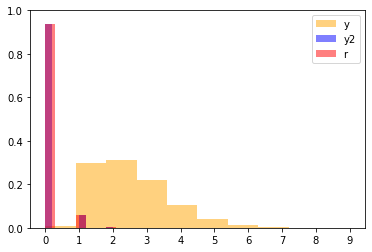

In [36]:
plt.hist(df['card_color_y'], alpha = 0.5, color = 'orange')
plt.hist(df['card_color_y2'], alpha = 0.5, color = 'blue')
plt.hist(df['card_color_r'], alpha = 0.5, color= 'red')

plt.legend(labels = ['y', 'y2', 'r'])
plt.xticks(range(10))
plt.yticks(np.linspace(0, 29560, 6), np.round(np.linspace(0, 1, 6), 2))
plt.show()